# Heart Disease Prediction


This project focuses on predicting the likelihood of heart disease based on various medical attributes. The dataset used in this project contains features such as age, sex, cholesterol levels, and other clinical data. Using machine learning algorithms, the project aims to assist in early detection and prevention of heart disease.

## Features and Functionality

Data Preprocessing: Includes handling missing values, normalization, and encoding categorical variables.

Exploratory Data Analysis (EDA): Visualizes patterns and trends in the data using tools like Matplotlib and Seaborn.

Machine Learning Models: Implements multiple models for prediction:
Logistic Regression
Random Forest Classifier
Support Vector Machine (SVM)

Model Evaluation: Evaluates models using metrics such as accuracy, precision, recall, F1-score, and confusion matrices.

### Libraries Used

The project relies on the following libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

#### 1.Loading the Dataset:

The dataset is read into a Pandas DataFrame from a file named heart.csv. Replace 'heart.csv' with the actual path to your dataset if it's located elsewhere.

#### 2.Checking Dataset Information:

Displays a concise summary of the dataset, including:

    Column names
    Non-null counts
    Data types (e.g., int, float, object)

#### 3. Checking for Missing Values:

Identifies the number of missing values in each column. This step is crucial for understanding if any data imputation or cleaning is required.

In [2]:
# Load your dataset (replace 'dataset.csv' with the actual file path)
data = pd.read_csv('heart.csv')

# Check for basic info and missing values
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


#### Renaming Columns:

Renames the columns for better clarity and understanding. For example, cp is likely chest pain type, and fbs might represent fasting blood sugar.

#### Converting Object Columns to Numeric:

Converts object-type columns (ca and thal) into numeric format, handling invalid parsing by setting them as NaN.

#### Separating Features and Target:

Splits the dataset into features (X) and target (y). The target column represents the output variable (presence of heart disease).

#### Handling Missing Values:

Fills missing values in the numerical columns with the mean of each column.

#### Splitting the Dataset:

Divides the dataset into training (80%) and testing (20%) sets for model evaluation.

#### Training a Random Forest Model:

Trains a RandomForestClassifier using the training data.

#### Evaluating the Model:

Makes predictions on the test data and generates a classification report, including precision, recall, F1-score, and support for each class.

In [3]:
# Rename columns for clarity
data.columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", 
    "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Convert 'ca' and 'thal' to numeric (they were object types)
data["ca"] = pd.to_numeric(data["ca"], errors="coerce")
data["thal"] = pd.to_numeric(data["thal"], errors="coerce")

# Separate features and target
X = data.drop(columns=["target"])
y = data["target"]

# Handle missing values (imputation)
from sklearn.impute import SimpleImputer

# Numerical imputation
num_imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(num_imputer.fit_transform(X), columns=X.columns)

# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a basic model for demonstration
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



#### Distribtion of Target variable

Check Class Distribution: This gives a quick view of how many instances belong to each class in the target variable (y).

Identify Class Imbalance: Ensures that the target variable is not heavily imbalanced, which could affect model performance.

In [4]:
print(y.value_counts())


1    165
0    138
Name: target, dtype: int64


#### Hyperparameter Grid:

n_estimators: The number of trees in the forest.
    
max_depth: The maximum depth of each tree (None allows trees to grow until all leaves are pure or contain less than min_samples_split samples).
    
min_samples_split: The minimum number of samples required to split an internal node.
    
min_samples_leaf: The minimum number of samples required to be at a leaf node.

#### Grid Search Initialization:

GridSearchCV:

Explores all combinations of hyperparameters in param_grid.

Uses 5-fold cross-validation (cv=5) to ensure robust evaluation of each combination.

RandomForestClassifier(random_state=42): Base model for which parameters are being optimized.

#### Training the Grid Search:

Trains the Random Forest Classifier for all parameter combinations in the grid on the training data.

#### Best Parameters:

Outputs the combination of parameters that resulted in the best cross-validation performance.

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


#### Class Weights Adjustment:

class_weight="balanced":

Adjusts the weight of each class inversely proportional to their frequencies in the dataset.
Ensures that the model gives equal importance to minority and majority classes.

random_state=42:
Ensures reproducibility by setting a seed for random number generation.

#### Model Training:

Fits the Random Forest Classifier on the training data.

#### Prediction:

Makes predictions on the test set.

#### Evaluation:

classification_report: Provides metrics like precision, recall, F1-score, and support for each class.

confusion_matrix: Displays a matrix comparing actual vs. predicted labels for detailed performance insights.

In [6]:
# Train model with balanced class weights
model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

[[25  4]
 [ 4 28]]


Precision: Proportion of correct positive predictions out of all positive predictions.
Recall: Proportion of actual positives identified correctly.
F1-Score: Harmonic mean of precision and recall.

#### Numerical Features:

select_dtypes(include=['int64', 'float64']):
Selects columns with data types int64 and float64, which are numerical data types.

columns:
Returns the column names as an index object.

num_features:
Contains the names of all numerical features in the dataset.

#### Categorical Features:

select_dtypes(include=['object', 'category']):
Selects columns with data types object (typically string data) and category.

cat_features:
Contains the names of all categorical features in the dataset.

In [7]:
# Identify numerical and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object', 'category']).columns


#### Scaler Initialization:

MinMaxScaler():

Scales numerical features to a range between 0 and 1.
Ensures that all numerical features are on the same scale, which helps many machine learning algorithms perform better.

Alternative:

Use StandardScaler() for standardization if your model requires a zero mean and unit variance.

#### Transform Numerical Features:

fit_transform:
fit: Computes the min and max values for each feature in num_features.

transform: Applies the scaling transformation to the data.

Assignment:
Updates the numerical features in the dataset X with the scaled values.

In [8]:
scaler = MinMaxScaler()  # Use StandardScaler() for standardization
X[num_features] = scaler.fit_transform(X[num_features])


#### Inspect Column Names:

Useful for verifying that column names are consistent and as expected.
Helps in debugging or identifying columns for specific operations.

Verify Renaming or Preprocessing:

After renaming or other modifications to columns, you can confirm the changes.

In [9]:
print(data.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


#### One-Hot Encoder Initialization:

drop='first':
Drops the first category in each feature to avoid multicollinearity, ensuring the encoded features do not become linearly dependent.
This is commonly done when the encoded features represent a categorical variable with k categories, and you only keep k-1 categories to prevent the "dummy variable trap."

sparse=False:
Returns the encoded features as a dense numpy array instead of a sparse matrix.

OneHotEncoder:
Converts categorical variables into a series of binary columns, where each column represents one category.

#### Apply One-Hot Encoding:

fit_transform:
Fits the encoder to the categorical features in X[cat_features] and transforms them into one-hot encoded values.

get_feature_names_out:
Retrieves the names of the new columns created by encoding the categorical variables. These names are derived from the original categorical column names.

#### Update X:

drop(columns=cat_features):
Removes the original categorical columns from the dataset since they have been encoded.

reset_index(drop=True):
Resets the index of the DataFrame without adding the old index as a column.

pd.concat([X, encoded_features], axis=1):
Concatenates the encoded features to the existing X DataFrame along the columns (axis=1).

In [10]:
# Apply One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse=False)  # Drop first to avoid multicollinearity
encoded_features = pd.DataFrame(
    encoder.fit_transform(X[cat_features]),
    columns=encoder.get_feature_names_out(cat_features)
)

# Drop original categorical features and concatenate encoded features
X = X.drop(columns=cat_features).reset_index(drop=True)
X = pd.concat([X, encoded_features], axis=1)


C:\Users\Jiyad Khan  Sikandri\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Check for Duplicate Rows:

duplicated(): This function checks if any rows in the DataFrame are duplicates. It returns a boolean Series where True indicates that the corresponding row is a duplicate of a previous row.

sum(): Summing the boolean values gives the total number of duplicate rows in the DataFrame.

Output: The code will print the number of duplicate rows in the dataset.

#### Drop Duplicate Rows:

drop_duplicates(): This function removes duplicate rows from the DataFrame.

inplace=True: Modifies the original DataFrame directly, rather than returning a new DataFrame without duplicates.

In [11]:
# Check for duplicate rows
print("Duplicate Rows:", data.duplicated().sum())

# Drop duplicates if any
data.drop_duplicates(inplace=True)


Duplicate Rows: 1


#### Dataset Overview:

info():

Displays a concise summary of the DataFrame, including:

The number of entries (rows).

The column names and their data types.

The number of non-null values in each column.

This helps identify missing data and check the types of each feature (e.g., numeric, categorical).

#### Summary Statistics:

describe():

Provides summary statistics for numeric columns, including:

Count: Number of non-null values.

Mean: The average value of each column.

Standard Deviation (std): The variability of the column values.

Min/Max: The minimum and maximum values.

25%, 50%, 75% percentiles: The quartiles for each feature.

Helps you understand the central tendency, spread, and potential outliers in your data.

In [12]:
# Dataset overview
print(data.info())

# Summary statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB
None
             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  

#### Check Target Variable Distribution:

value_counts(): This function counts the occurrences of each unique value in the target column.

For binary classification tasks (such as predicting heart disease presence), it will show how many instances belong to each class (0 and 1 in this case).

#### Visualize Target Distribution:

sns.countplot(): This function from Seaborn generates a count plot (bar plot) that shows the number of occurrences for each class in the target variable.

plt.title(): Adds a title to the plot.

plt.show(): Displays the plot.

The plot will show two bars: one for each class (0 and 1). This gives a visual representation of the class distribution.

1    164
0    138
Name: target, dtype: int64


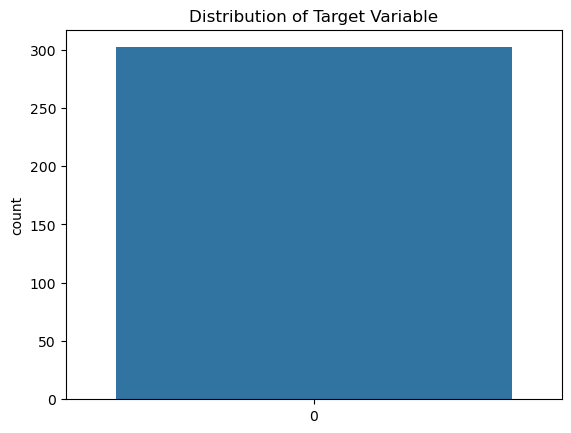

In [13]:
# Check target variable distribution
print(data['target'].value_counts())

# Visualize target distribution
sns.countplot(data['target'])
plt.title('Distribution of Target Variable')
plt.show()


#### Compute Correlation Matrix:

corr(): This method computes the Pearson correlation coefficient between all pairs of numerical features in the DataFrame. It measures the strength and direction of the linear relationship between two variables:

+1: Perfect positive correlation.

-1: Perfect negative correlation.

0: No correlation.

The result is a correlation matrix where each cell represents the correlation between two features.

#### Visualize Correlation Matrix:

plt.figure(figsize=(10, 8)): Adjusts the figure size of the plot for better readability.

sns.heatmap(): Creates a heatmap from the correlation matrix:

annot=True: Annotates each cell with the correlation coefficient.

fmt=".2f": Formats the correlation coefficients to two decimal places.

cmap="coolwarm": Sets the color palette for the heatmap (cool for negative, warm for positive correlations).

plt.title(): Adds a title to the heatmap.

plt.show(): Displays the heatmap.

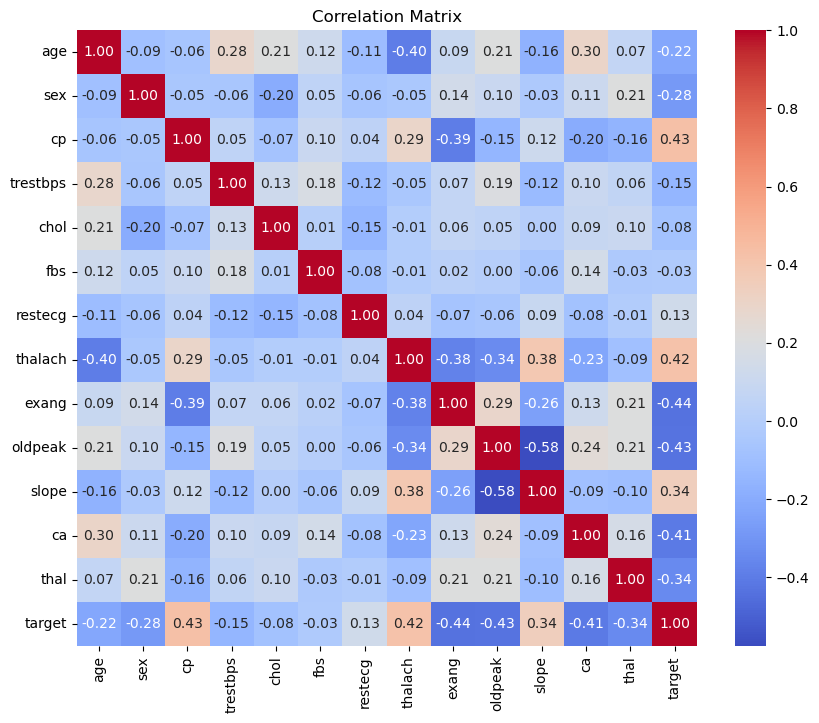

In [14]:
# Correlation matrix
corr_matrix = data.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


#### Generate Histograms for Numerical Features:

data.hist(): This method automatically plots histograms for all numerical columns in the DataFrame.

figsize=(12, 10): Specifies the size of the entire figure (width x height).

bins=20: Divides the data into 20 bins (intervals). You can adjust this number depending on the spread and the number of data points.

color='skyblue': Sets the color of the bars in the histogram.

edgecolor='black': Adds black borders around each bar for better visual clarity.

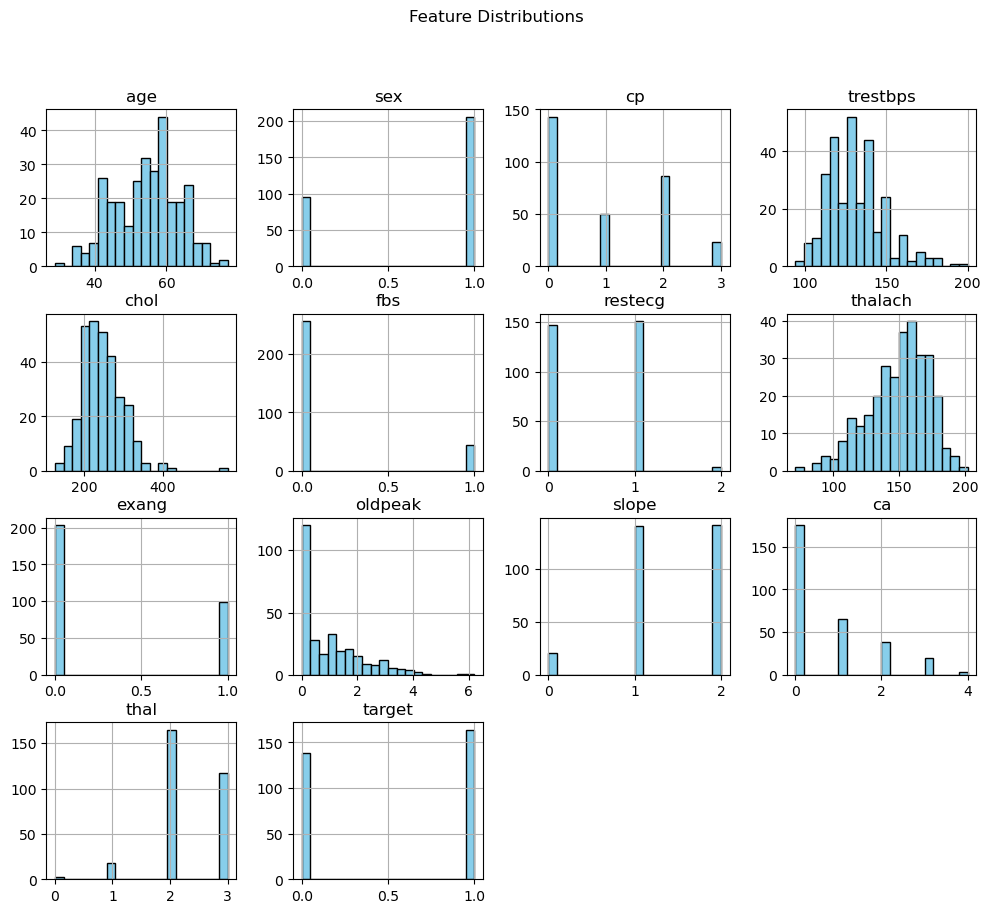

In [15]:
# Histograms for numerical features
data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()


#### Boxplot for Numerical Features vs Target:

sns.boxplot(): Creates a boxplot to compare the distribution of the age feature across the two target classes (0 and 1).

x='target': Specifies the target variable on the x-axis.

y='age': Specifies the numerical feature (age) on the y-axis.

Boxplot Details: It shows the median, quartiles, and outliers of age for each class in target. This helps identify whether the feature distribution differs significantly between the two classes.

Title: The plot is titled "Age vs Target."

#### Pairplot for Selected Features:

sns.pairplot(): This creates pairwise scatter plots for the specified variables (age, trestbps, chol, thalach, oldpeak), with the target class (target) indicated by different colors.

vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']: Specifies the features to plot against each other in pairwise combinations.

hue='target': Colors the points according to the target class (0 or 1).

diag_kind='kde': Displays Kernel Density Estimation (KDE) plots on the diagonal instead of histograms, which is useful for visualizing the distribution of each feature.

Title: The plot is titled "Pairplot of Features (by Target)."

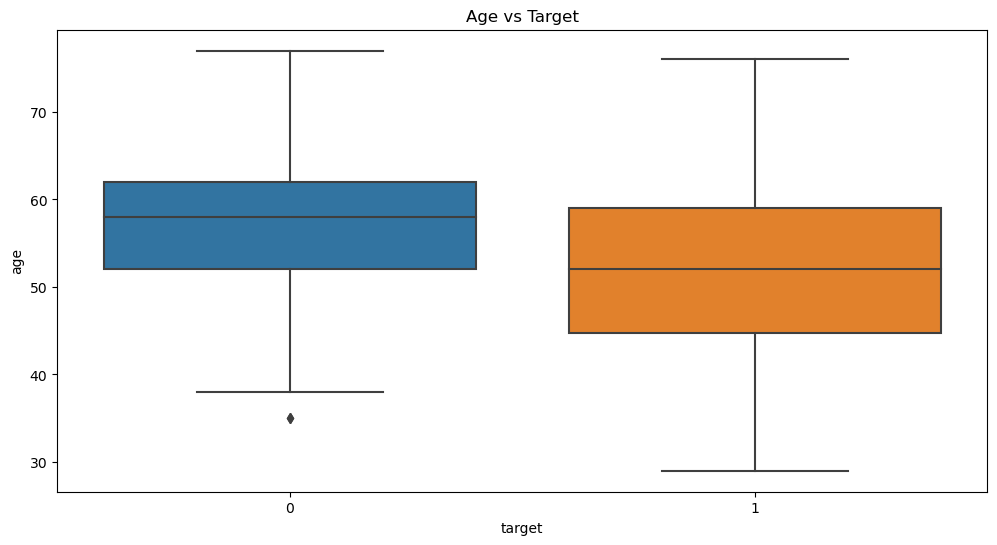

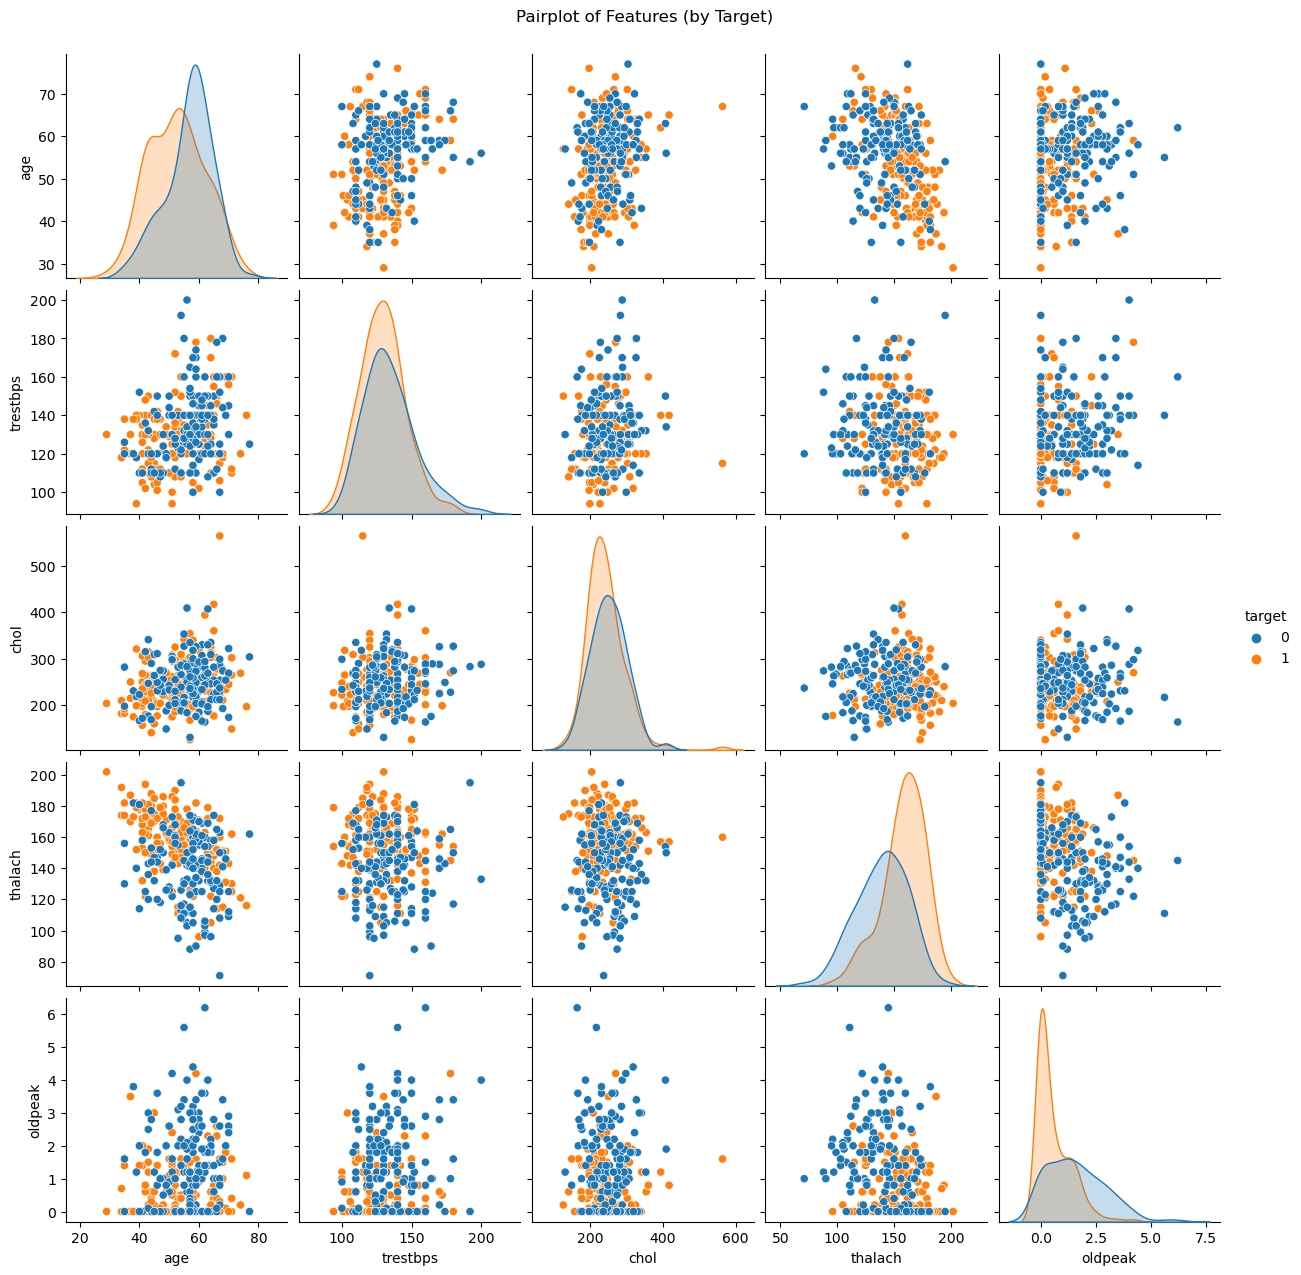

In [16]:
# Boxplot for numerical features vs target
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='age', data=data)
plt.title('Age vs Target')
plt.show()

# Pairplot for selected features
sns.pairplot(data, vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], hue='target', diag_kind='kde')
plt.suptitle('Pairplot of Features (by Target)', y=1.02)
plt.show()


#### Categorical Features List:

This list defines the categorical features in your dataset that will be visualized. These include features like sex, cp (chest pain type), fbs (fasting blood sugar), etc.

#### Loop through Categorical Features:

The for loop iterates over the list of categorical features.

For each feature, the code creates a count plot:

sns.countplot(x=feature, hue='target', data=data): This creates a bar plot for the categorical feature (feature), with the bars colored according to the target class (hue='target').

feature.capitalize(): Capitalizes the feature name for the plot title (e.g., "Sex vs Target").

plt.show(): Displays the plot for each feature.

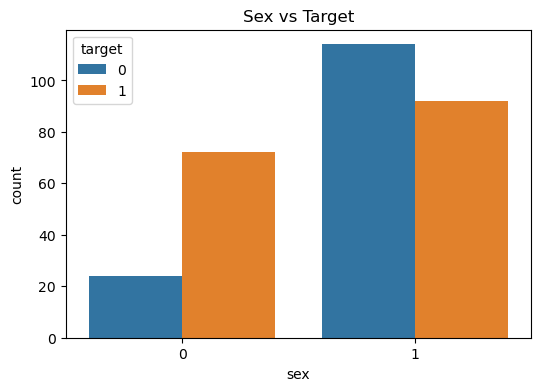

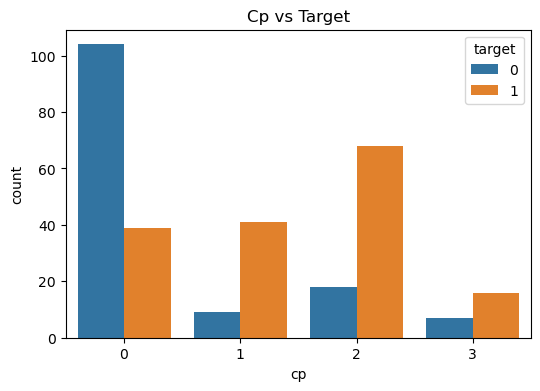

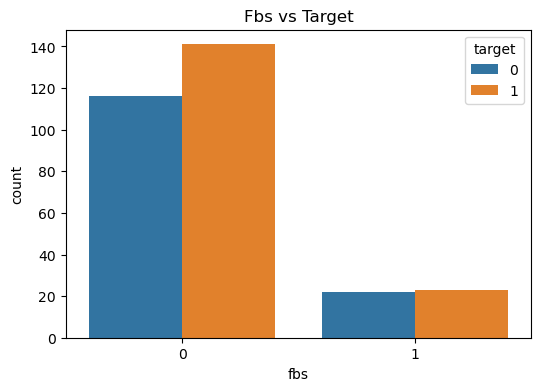

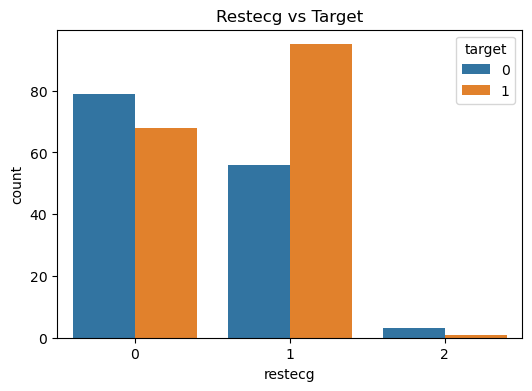

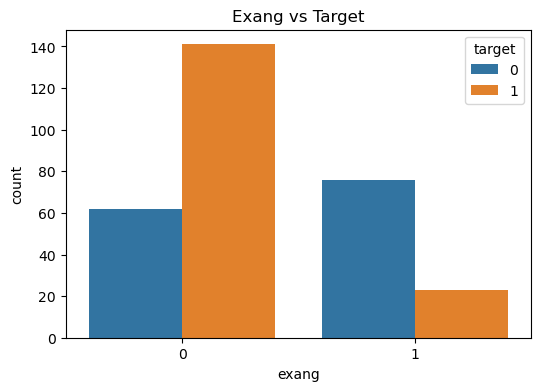

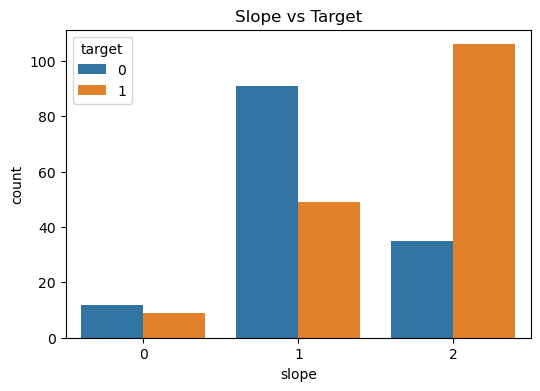

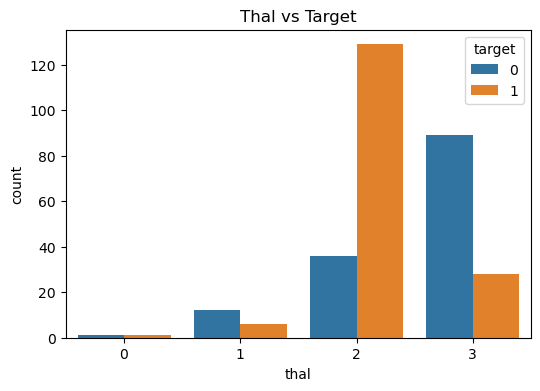

In [17]:
# Bar plots for categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='target', data=data)
    plt.title(f'{feature.capitalize()} vs Target')
    plt.show()


#### Histograms for Numerical Features:

data.hist(): Generates histograms for all numerical features in the dataset.

numerical_features: Identifies the numerical features by selecting columns with types int64 and float64.

plt.suptitle('Histograms for Numerical Features'): Adds a title to the histograms.

plt.show(): Displays the histograms.

#### Boxplots for All Numerical Features:

sns.boxplot(): Creates a boxplot for each numerical feature, showing the distribution and potential outliers.

plt.title(): Adds the title for each boxplot with the respective feature name.

plt.show(): Displays each boxplot.

#### Countplots for All Categorical Features:

categorical_features: Identifies the categorical features by selecting columns with types object or category.

sns.countplot(): Creates a bar plot for each categorical feature, showing the distribution of classes.

plt.title(): Adds the title for each countplot with the respective feature name.

plt.show(): Displays each countplot.

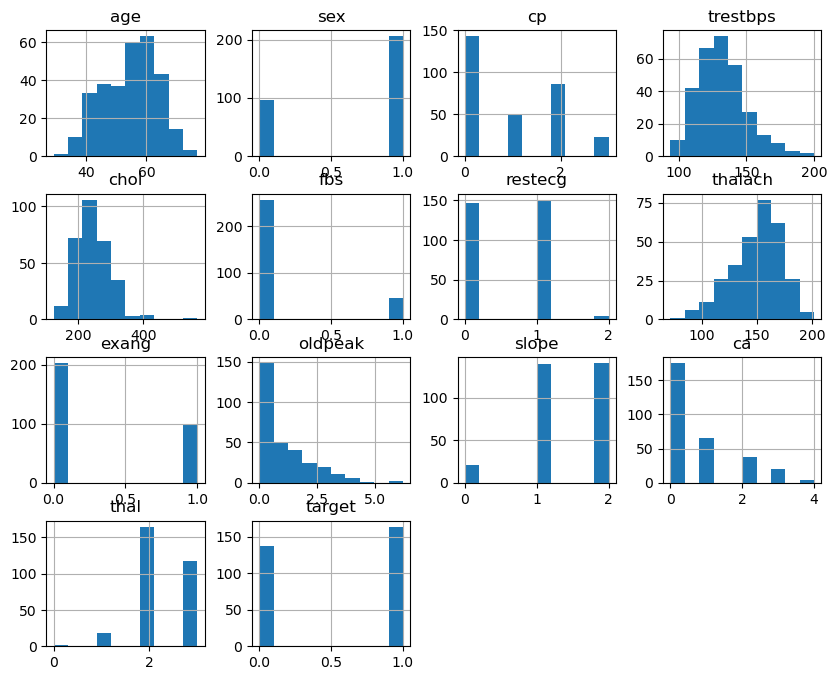

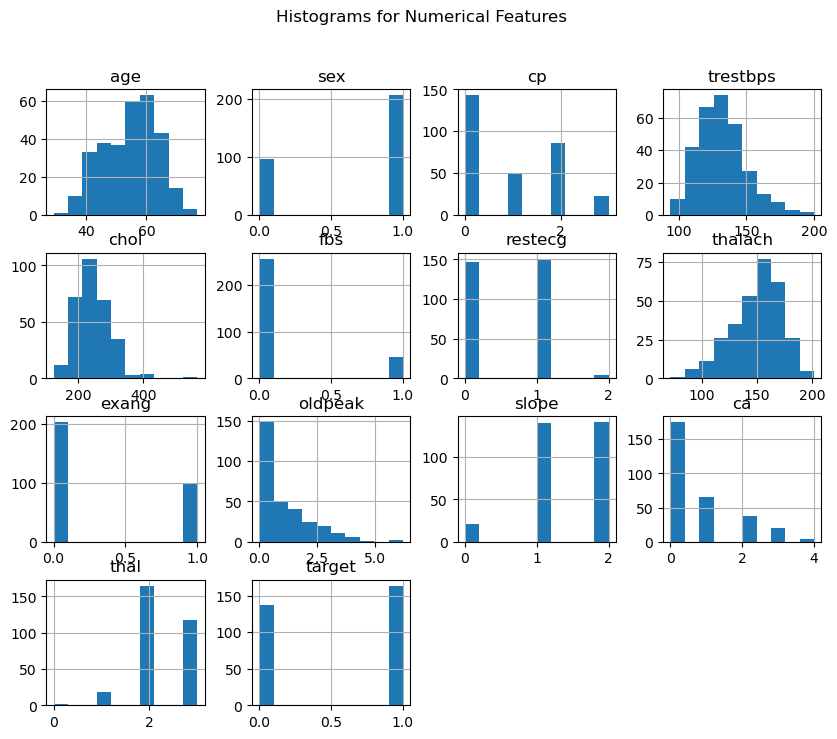

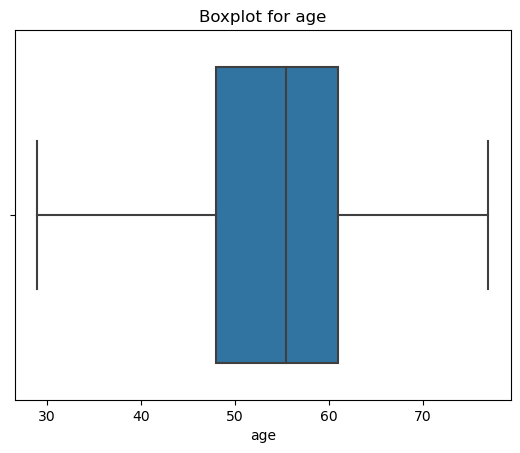

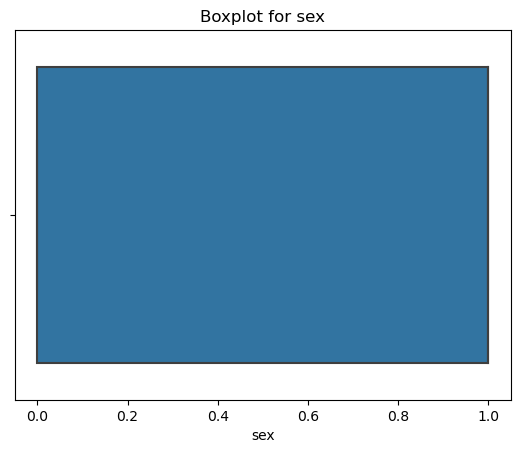

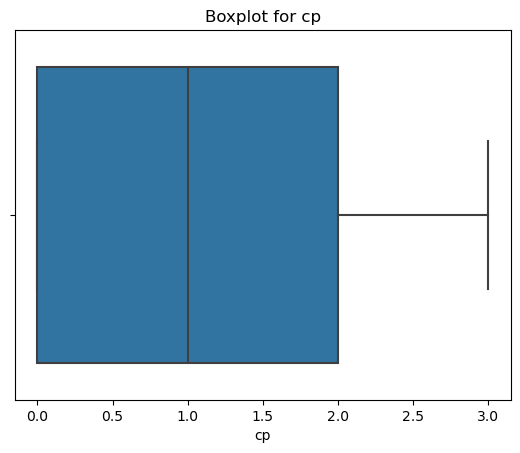

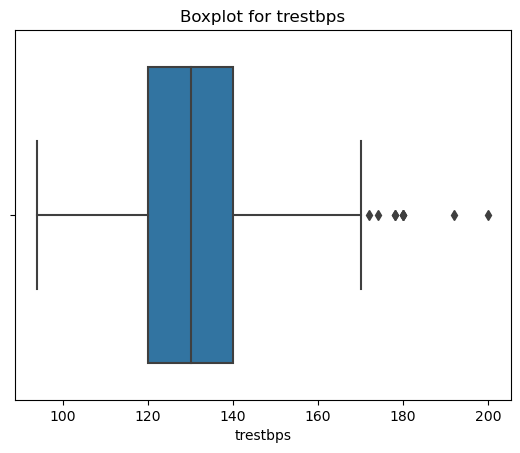

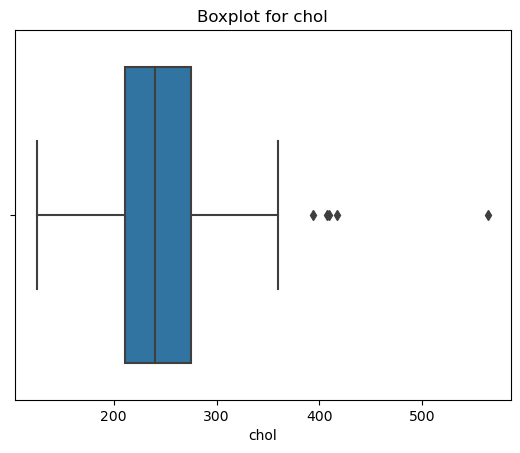

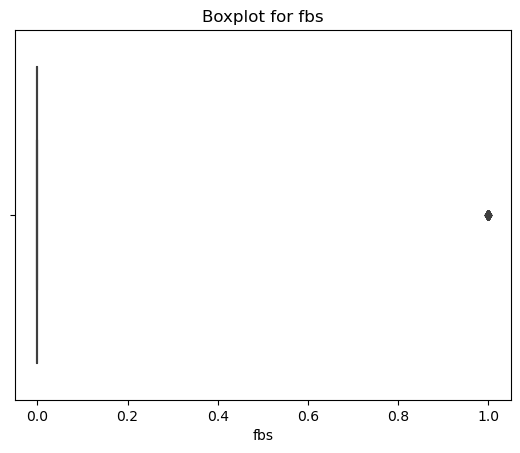

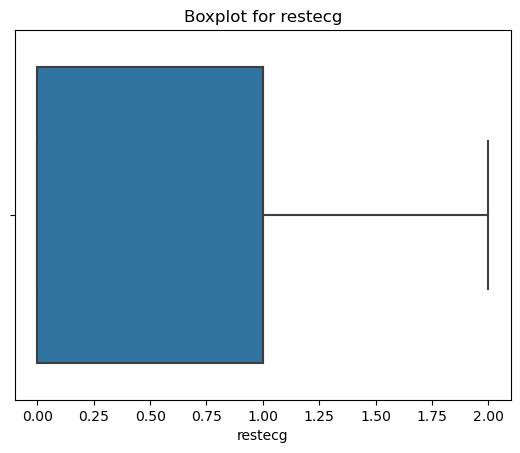

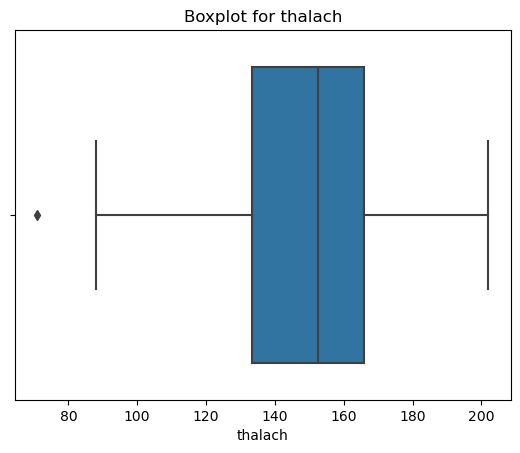

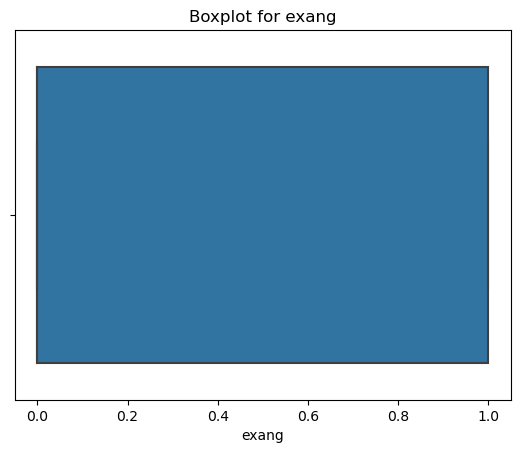

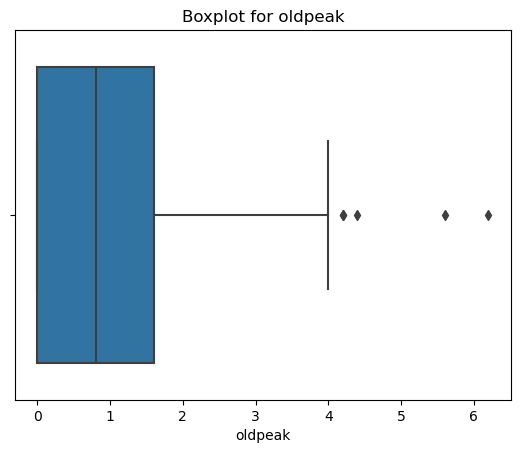

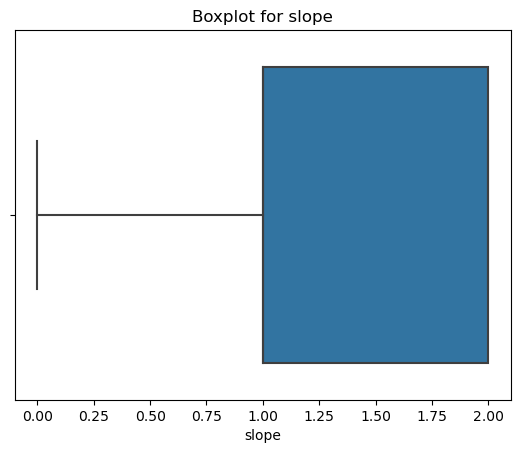

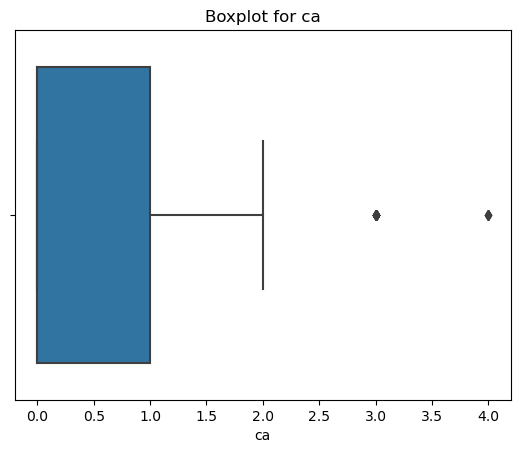

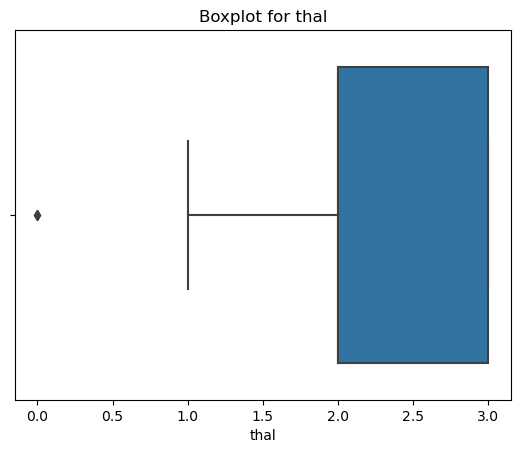

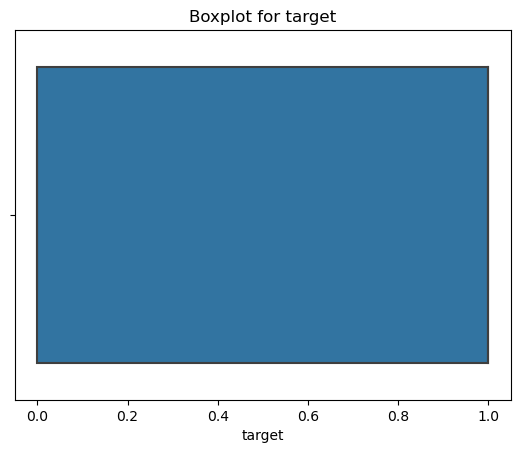

In [18]:
data.hist(figsize=(10, 8))
# Histograms for all numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_features].hist(figsize=(10, 8))
plt.suptitle('Histograms for Numerical Features')
plt.show()

# Boxplots for all numerical features
for feature in numerical_features:
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

# Countplots for all categorical features
categorical_features = data.select_dtypes(include=['object', 'category']).columns
for feature in categorical_features:
    sns.countplot(x=data[feature])
    plt.title(f'Countplot for {feature}')
    plt.show()


#### Training Models:

Logistic Regression: A linear model for binary classification.

Random Forest: An ensemble method based on decision trees, useful for handling non-linear relationships.

SVM: A powerful classification algorithm that works well for high-dimensional data.

#### Making Predictions:

Each model is used to make predictions on the test set (X_test).

#### Collecting Results:

Accuracy: Measures the overall correctness of the model.

Precision: Measures the proportion of correctly predicted positive instances among all predicted positives.

Recall: Measures the proportion of correctly predicted positive instances among all actual positives.

The average='macro' argument computes the metrics for each class and then averages them, treating each class equally.

#### Create and Display Results DataFrame:

The results are stored in a dictionary and converted into a Pandas DataFrame for easy visualization.

The final DataFrame displays the performance of each model (Logistic Regression, Random Forest, SVM) with respect to the three evaluation metrics.

In [20]:
# Train models
logistic_model = LogisticRegression(random_state=42).fit(X_train, y_train)
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
svm_model = SVC(random_state=42).fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

# Collect results in a dictionary
results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_logistic),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm)
    ],
    "Precision": [
        precision_score(y_test, y_pred_logistic, average='macro'),
        precision_score(y_test, y_pred_rf, average='macro'),
        precision_score(y_test, y_pred_svm, average='macro')
    ],
    "Recall": [
        recall_score(y_test, y_pred_logistic, average='macro'),
        recall_score(y_test, y_pred_rf, average='macro'),
        recall_score(y_test, y_pred_svm, average='macro')
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_logistic, average='macro'),
        f1_score(y_test, y_pred_rf, average='macro'),
        f1_score(y_test, y_pred_svm, average='macro')
    ],
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

C:\Users\Jiyad Khan  Sikandri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.885246   0.885823  0.884159  0.884750
1        Random Forest  0.836066   0.835668  0.835668  0.835668
2                  SVM  0.704918   0.728070  0.696121  0.690878
